In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
from IPython.display import display
import copy

In [2]:
filename = 'test'
#byte or text
bt = 't'

import csv
file = open(filename+'.csv', 'r'+bt)
reader = csv.reader(file)
dataset = []
for row in reader:
    dataset.append(list(map(int, row)))

#data1 = [1,2,3,4,5,6]
#data2 = [1,1,1,1,1,1]
#data3 = [1,2,1,2,1,2]
#dataset = [data1,data2,data3]
dataset_org = copy.deepcopy(dataset)
cur_index = 0

In [3]:
trunc_index = []
for data in dataset:
    trunc_index.append({'x': 0,'y': len(data)-1})

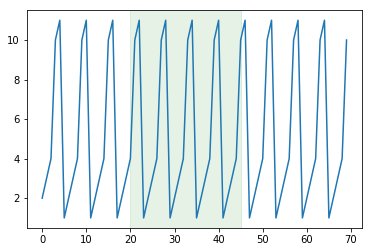

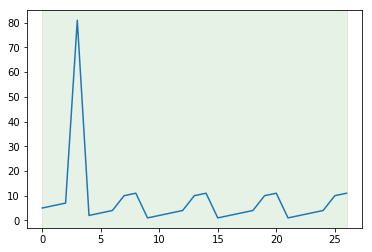

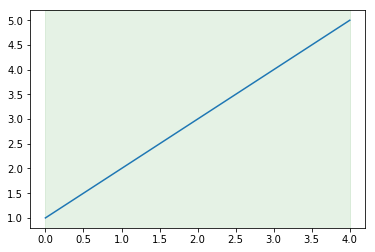

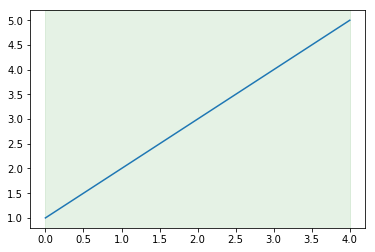

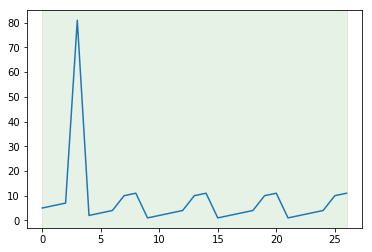

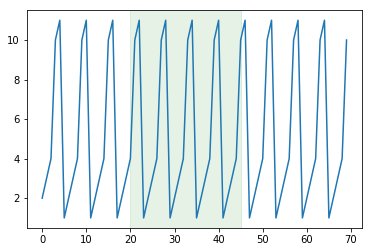

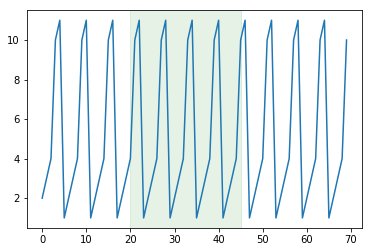

In [10]:
indexSel = widgets.Dropdown(options=list(range(len(dataset))),
    description='data set:', value=cur_index)
#def index_change(change):
#    if change['type'] == 'change' and change['name'] == 'value':
#        index = change['new']
#        draw_data_cutter(dataset[index])
#indexSel.observe(index_change)

btnOk = widgets.Button(description='Truncate')
def truncate(b):
    x = trunc_index[cur_index]['x']
    y = trunc_index[cur_index]['y']+1
    data = dataset[cur_index]
    del data[y:]
    del data[:x]
    set_trunc_x(0)
    set_trunc_y(len(data))
    draw_data_cutter(cur_index)
btnOk.on_click(truncate)

btnReset = widgets.Button(description='Reset')
def reset(b):
    dataset[cur_index] = copy.copy(dataset_org[cur_index])
    set_trunc_x(0)
    set_trunc_y(len(dataset[cur_index])-1)
    draw_data_cutter(cur_index)
btnReset.on_click(reset)

btnSave = widgets.Button(description='Save')
def save(b):
    #todo
    file = open(filename+'_trunc.csv', 'w'+bt)
    writer = csv.writer(file)
    for data in dataset:
        writer.writerow(data)
    print('Saved!')
btnSave.on_click(save)

trunc_sl = widgets.IntRangeSlider(value=[0,1], min=0, max=trunc_index[cur_index]['y'])
def update_trunc(change):
    x = change['new'][0]
    y = change['new'][1]
    set_trunc_x(x)
    set_trunc_y(y)
trunc_sl.observe(update_trunc, names='value')

def draw_data_cutter(index):
    global cur_index 
    cur_index = index
    plt.plot(range(len(dataset[index])),dataset[index])
    x = trunc_index[index]['x']
    y = trunc_index[index]['y']
    plt.axvspan(x, y, color='green', alpha=0.1)
    trunc_sl.max = len(dataset[index])-1
    set_trunc_x(x)
    set_trunc_y(y)
        
def set_trunc_x(x):
    trunc_index[cur_index]['x'] = x
    y = trunc_index[cur_index]['y']
    trunc_sl.value = [x,y]
def set_trunc_y(y):
    trunc_index[cur_index]['y'] = y
    x = trunc_index[cur_index]['x']
    trunc_sl.value = [x,y]

btnPrev = widgets.Button(description='Prev')
def prev_data(b):
    global cur_index
    cur_index -= 1
    if(cur_index < 0): cur_index = 0
    draw_data_cutter(cur_index)
btnPrev.on_click(prev_data)
btnNext = widgets.Button(description='Next')
def next_data(b):
    global cur_index
    cur_index += 1
    if(cur_index >= len(dataset)): cur_index = len(dataset)-1
    draw_data_cutter(cur_index)
btnNext.on_click(next_data)
    
display(widgets.HBox((btnOk,btnReset,btnSave)))
display(widgets.HBox((btnPrev,btnNext)))
interact(draw_data_cutter, index=indexSel)
display(trunc_sl)